In [ ]:
pip install lasio

In [3]:
import lasio

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()

Saving WLC_PETRO_COMPUTED_INPUT_1.LAS to WLC_PETRO_COMPUTED_INPUT_1.LAS


In [12]:
import glob
import os

In [14]:
las1 = lasio.read("WLC_PETRO_COMPUTED_INPUT_1.LAS")

In [15]:
df1 = las1.df()

In [19]:
df1.keys()

Index(['CALI', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RHOB', 'RT'], dtype='object')

In [18]:
df1 = df1.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS','ROP',	'RPCEHM',	'RPCELM','DRHO','RACELM','RACEHM','RD','RM'], axis = 1) 

In [26]:
 df1 = df1.reset_index()

In [21]:
df1 = df1.loc[(df1['DEPTH'] >= 2600) & (df1['DEPTH'] <= 3720)]

In [27]:
df1

,level_0,index,DEPTH,CALI,DT,DTS,GR,NPHI,PEF,RHOB,RT
0,0,24115,2600.0,8.648,104.605,261.584,82.748,0.371,7.126,2.356,1.323
1,1,24116,2600.1,8.578,103.827,262.161,79.399,0.341,6.654,2.338,1.196
2,2,24117,2600.2,8.578,102.740,262.730,74.248,0.308,6.105,2.315,1.171
3,3,24118,2600.3,8.547,100.943,263.018,68.542,0.283,5.613,2.291,1.142
4,4,24119,2600.4,8.523,98.473,263.037,60.314,0.272,5.281,2.269,1.107
...,...,...,...,...,...,...,...,...,...,...,...
11196,11196,35311,3719.6,8.703,84.800,149.500,70.191,0.236,7.438,2.617,1.627
11197,11197,35312,3719.7,8.750,85.013,147.636,75.393,0.238,7.258,2.595,1.513
11198,11198,35313,3719.8,8.766,85.054,145.299,82.648,0.236,7.076,2.571,1.420
11199,11199,35314,3719.9,8.781,84.928,142.394,89.157,0.217,6.956,2.544,1.349


In [28]:
df1 = df1.reindex(columns=['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT'])

In [30]:
df1

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT
0,2600.0,0.371,2.356,82.748,1.323,7.126,8.648,104.605
1,2600.1,0.341,2.338,79.399,1.196,6.654,8.578,103.827
2,2600.2,0.308,2.315,74.248,1.171,6.105,8.578,102.740
3,2600.3,0.283,2.291,68.542,1.142,5.613,8.547,100.943
4,2600.4,0.272,2.269,60.314,1.107,5.281,8.523,98.473
...,...,...,...,...,...,...,...,...
11196,3719.6,0.236,2.617,70.191,1.627,7.438,8.703,84.800
11197,3719.7,0.238,2.595,75.393,1.513,7.258,8.750,85.013
11198,3719.8,0.236,2.571,82.648,1.420,7.076,8.766,85.054
11199,3719.9,0.217,2.544,89.157,1.349,6.956,8.781,84.928


In [31]:
x = df1.iloc[:,:-1]

In [32]:
x

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI
0,2600.0,0.371,2.356,82.748,1.323,7.126,8.648
1,2600.1,0.341,2.338,79.399,1.196,6.654,8.578
2,2600.2,0.308,2.315,74.248,1.171,6.105,8.578
3,2600.3,0.283,2.291,68.542,1.142,5.613,8.547
4,2600.4,0.272,2.269,60.314,1.107,5.281,8.523
...,...,...,...,...,...,...,...
11196,3719.6,0.236,2.617,70.191,1.627,7.438,8.703
11197,3719.7,0.238,2.595,75.393,1.513,7.258,8.750
11198,3719.8,0.236,2.571,82.648,1.420,7.076,8.766
11199,3719.9,0.217,2.544,89.157,1.349,6.956,8.781


In [33]:
y = df1.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = 0.5)

In [42]:
y_train.size

5600

In [41]:
x_train

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI
667,2666.7,0.238,2.228,30.097,0.389,4.935,8.547
6481,3248.1,0.092,2.565,10.290,4.584,7.919,8.648
9127,3512.7,0.174,2.567,40.940,1.819,8.256,8.672
234,2623.4,0.392,2.243,64.239,0.456,6.218,8.547
10969,3696.9,0.224,2.229,29.966,3.214,5.486,8.625
...,...,...,...,...,...,...,...
10893,3689.3,0.202,2.223,33.540,5.139,5.286,8.625
701,2670.1,0.233,2.261,38.017,0.431,5.159,8.547
5297,3129.7,0.104,2.551,6.737,3.925,8.444,8.672
4754,3075.4,0.078,2.599,8.091,4.929,8.395,8.625


In [43]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


In [44]:
model = GradientBoostingRegressor()

In [51]:
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
y_pred = model.predict(x_test)
print("R-squared of Well 1: {}".format(model.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Well 1: {}".format(rmse))

R-squared of Well 1: 1.0
RMSE of Well 1: 0.0


In [65]:
x = [y_test, y_pred]
y = [df1['DEPTH'], df1['DEPTH']]
fig, ax = plt.subplots()

color = ['purple']
title = ['True DT Well 1', 'Predicted DT Well 1']
fig, ax = plt.subplots(nrows=1, ncols=1 figsize=(15,10))
  ax.plot(x, y, color=color)
  ax.set_xlim(50, 150)
  ax.set_titletitle)
       
plt.tight_layout()





plt.show()

SyntaxError: ignored

In [66]:
x = [y_test, y_pred]
y = [df1['DEPTH'], df1['DEPTH']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  


Text(0.5, 1.0, 'Simple plot')

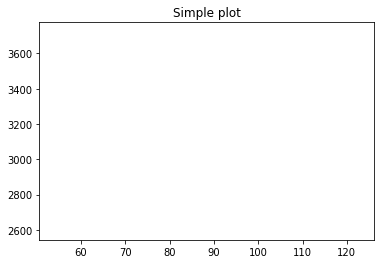

In [67]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
